<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/tube_bed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Fri Dec 18 22:58:51 UTC 2020


# Tube bed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

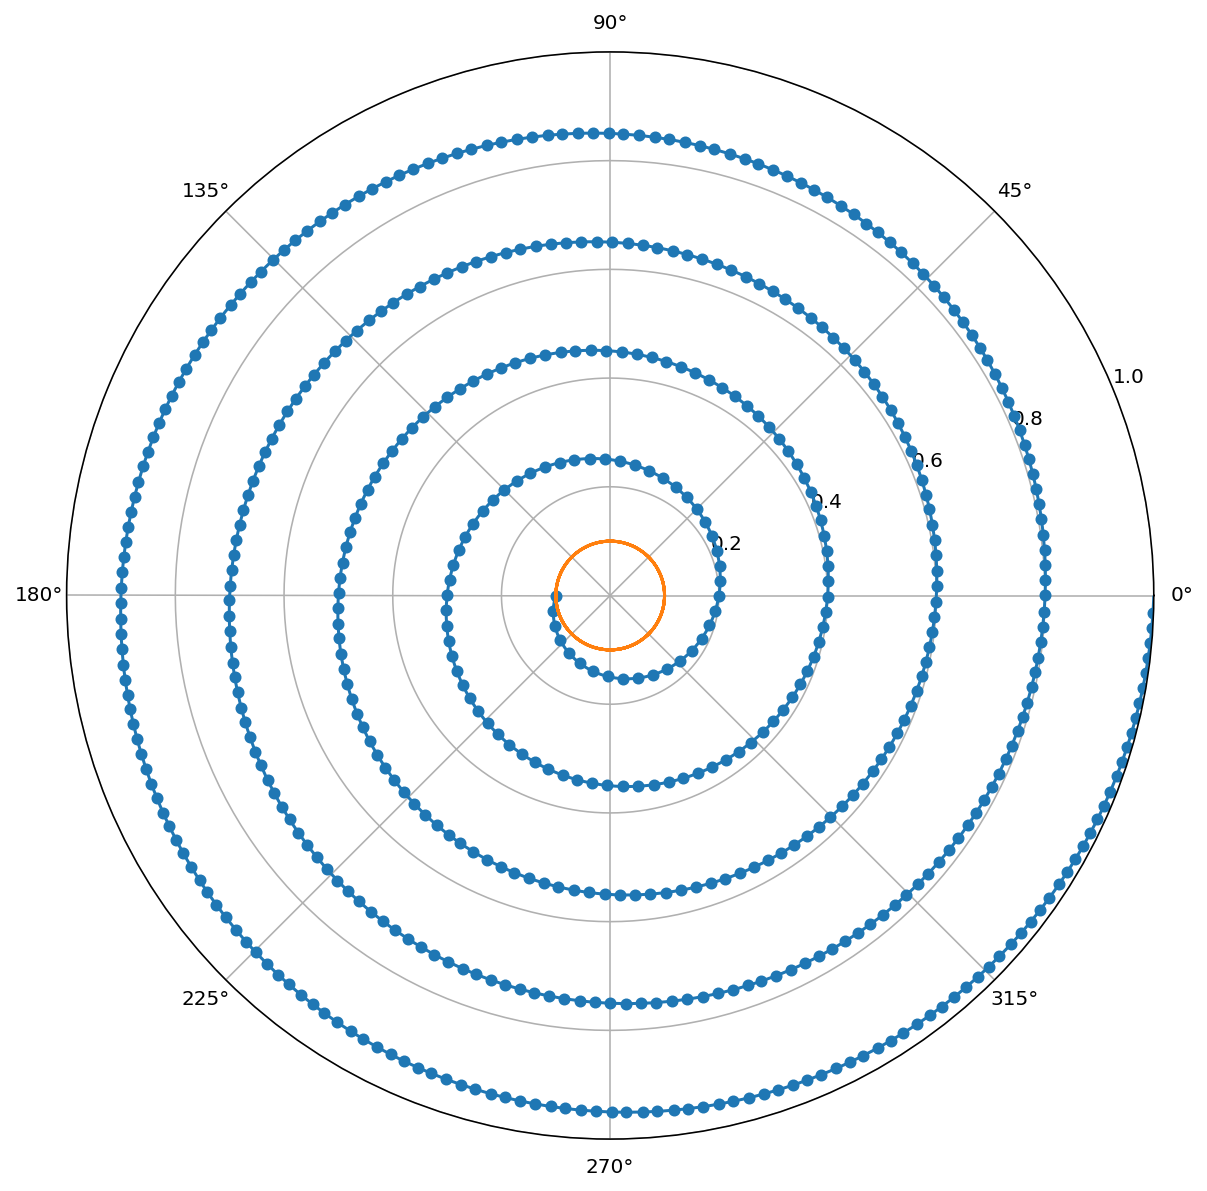

In [24]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={"projection":'polar'})

r = np.arange(0.1, 1, 0.0001)
theta = 10*np.pi*r
a = ax.plot(theta, r, marker='o', markevery=0.01, markersize=5)

ax.plot(theta, [0.1]*len(theta))
ax.set_rmax(1)

#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
#ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line

#ax.grid(True)

plt.show()

In [25]:
pts = np.array([theta, r]).T

In [26]:
distance = np.cumsum( np.sqrt(np.sum( np.diff(pts, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)/distance[-1]

In [27]:
from scipy.interpolate import interp1d

In [28]:
theta

array([ 3.14159265,  3.14473425,  3.14787584, ..., 31.40650176,
       31.40964335, 31.41278494])

In [29]:
f=interp1d(theta,r)
xnew=np.linspace(min(theta),max(theta),len(theta))
ynew=f(xnew)

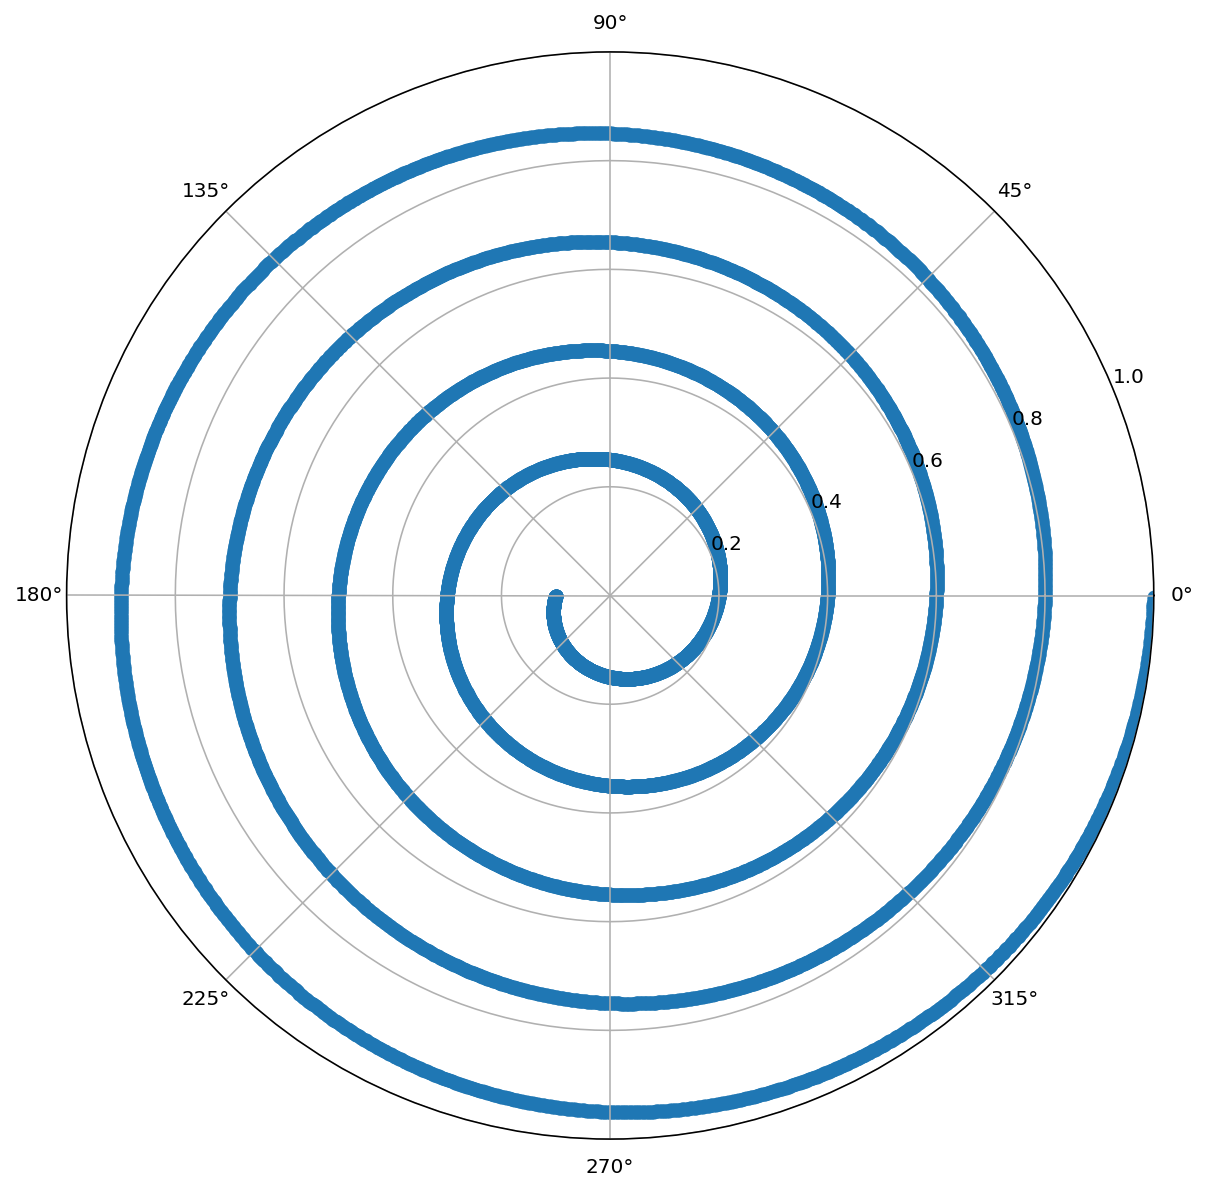

In [32]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={"projection":'polar'})

x = xnew
y = ynew

ax.scatter(x, y)#, marker='o', markevery=0.01, markersize=5)

ax.set_rmax(1)
plt.show()

In [33]:
def spiral_points(arc=1, separation=1):
    """generate points on an Archimedes' spiral
    with `arc` giving the length of arc between two points
    and `separation` giving the distance between consecutive 
    turnings
    - approximate arc length with circle arc at given distance
    - use a spiral equation r = b * phi
    """
    def p2c(r, phi):
        """polar to cartesian
        """
        return (r * math.cos(phi), r * math.sin(phi))

    # yield a point at origin
    yield (0, 0)

    # initialize the next point in the required distance
    r = arc
    b = separation / (2 * math.pi)
    # find the first phi to satisfy distance of `arc` to the second point
    phi = float(r) / b
    while True:
        yield p2c(r, phi)
        # advance the variables
        # calculate phi that will give desired arc length at current radius
        # (approximating with circle)
        phi += float(arc) / r
        r = b * phi

In [34]:
import math

In [35]:
def p2c(r, phi):
    '''
    polar to cartesian
    '''
    return (r * np.cos(phi), r * np.sin(phi))

def c2p(x, y):
    '''
    Quadrant I: Use the calculator value
    Quadrant II: Add 180°
    Quadrant III: Add 180°
    Quadrant IV: Add 360°
    '''
    r = np.sqrt(x**2 + y**2)
    
    if x>0 and y>0:
        phi = np.arctan(y/x)
    elif (x<0 and y>0) or (x>0 and y<0):
        phi = np.arctan(y/x) + np.pi
    else:
        phi = np.arctan(y/x) + 2*np.pi
    return (r, phi)

In [36]:
p2c(c2p(1, 2)[0], c2p(1, 2)[1])

(1.0000000000000002, 2.0)

In [37]:
c=0
blah = np.zeros((101, 2))
for i,j in spiral_points():
    if i==j==0:
        continue
    blah[c] = c2p(i,j)
    if c>=100:
        break
    c+=1

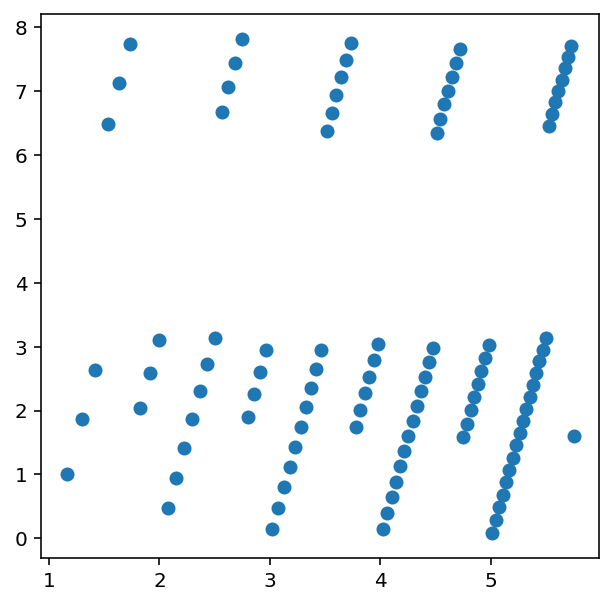

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))

x0 = blah[:,0]
y0 = blah[:,1]

x = blah[:,0][1:]
y = blah[:,1][1:]
r = np.sqrt(x**2 + y**2)
plt.scatter(x, y)

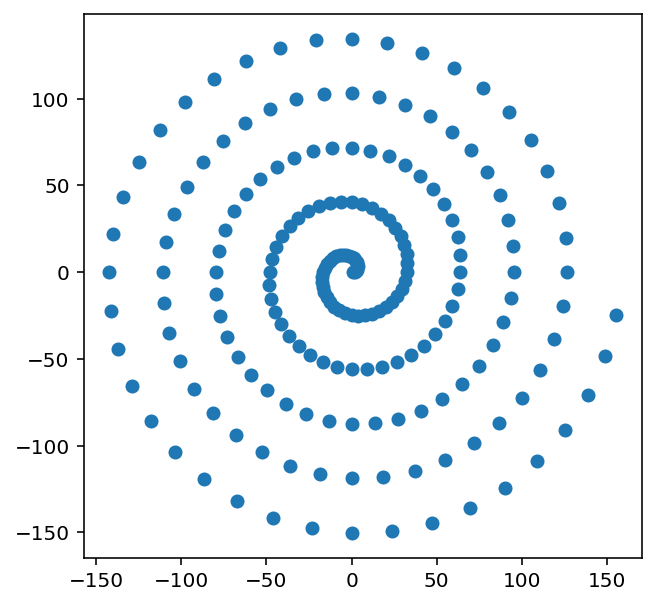

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))

xl = []
yl = []
for i in range(200):
    t = i / 20 * np.pi
    x = (1 + 5 * t) * np.cos(t)
    y = (1 + 5 * t) * np.sin(t)
    
    xl.append(x)
    yl.append(y)
    
ax.scatter(xl, yl)
plt.show()

In [18]:
import scipy.integrate as integrate

Theta starts at 0 and turns 5 times -> theta goes from 0 to 2*pi*5

r = a + b*theta

a = start point of spiral

b = affects distance between two arms (2*pi*b) distance between any two arms

In [19]:
nturns = 5

a = 1
b = 1

start = 0
stop = 2*np.pi*nturns

In [20]:
integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)

NameError: ignored